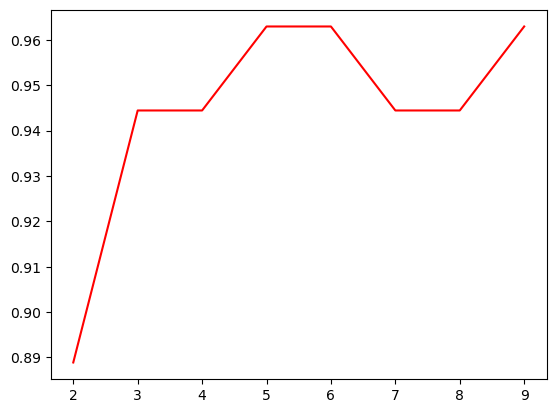

In [3]:
# 导入相应的包
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
# 导入数据
X,y = load_wine(return_X_y=True)
# 测试集，训练集的划分
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=30)
# 建模训练
score_list = []
for i in np.arange(2,10,1):
    clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=i)
    clf=clf.fit(Xrain,Ytrain)#训练
    score=clf.score(Xtest,Ytest)#用测试机返回预测的准确度
    score_list.append(score)
#展示结果   
plt.plot(np.arange(2,10,1),score_list,color="red")
plt.show()

In [ ]:
print(clf.n_features_in_)

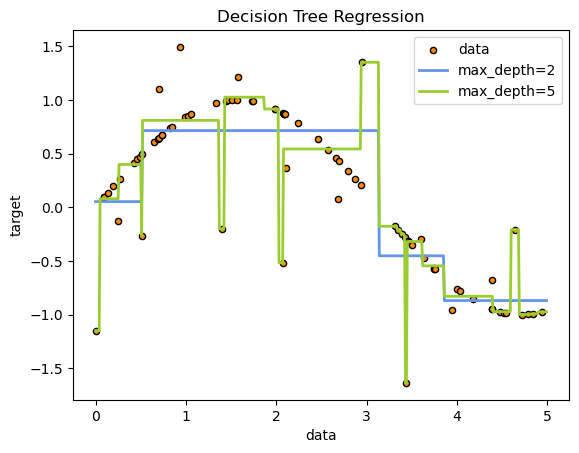

In [18]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


In [49]:
import collections
import math

def createTree(dataSet, labels, featLabels):
    print('-'*20)
    # 判断所有标签是否都一样
    # classList = [example[-1] for example in dataSet]
    classList = list(dataSet['F4-LOAN']) # pandas
    # 如果都一样，返回该值作为该节点的值
    if classList.count(classList[0])==len(classList):
        return classList[0]
    # 说明已经遍历完所有特征，返回数量最多的类别作为该节点的值
    # if len(dataSet[0]) == 1:
    if dataSet.shape[1]==1: # pandas
        return majorityCnt(classList)
    # 否则选择最好的特征对应的index（在这个函数里面通过计算信息增益等进行比较选择）
    # bestFeat = chooseBestFeatureToSplit(dataSet)
    # bestFeatLabel = labels[bestFeat]
    print(dataSet.shape)
    bestFeat = chooseBestFeatureToSplit(dataSet) # pandas
    print(f'bestFeat:{bestFeat}')
    # featLabels.append(bestFeatLabel)
    featLabels.append(bestFeat) # pandas
    print(f'featLabels:{featLabels}')
    # myTree = {bestFeatLabel:{}}
    myTree = {bestFeat:{}} # pandas
    # del labels[bestFeat]
    # labels.remove(bestFeat) # pandas
    # print(f'labels:{labels}')
    # 统计当前最优特征列中的种类的特征
    # featValue = [example[bestFeat] for example in dataSet]
    featValue = dataSet[bestFeat]
    uniqueVals = set(featValue)
    for value in uniqueVals:
        # 这里需要将数据集根据特征的类别进行划分，虽然前面把标签去掉了，但是只能保证不再递归已经用过的标签
        # myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), labels, featLabels)
        # pandas
        myTree[bestFeat][value] = createTree(
            splitDataSet(dataSet, bestFeat, value), labels, featLabels
        )
    return myTree
        
def majorityCnt(classList):
    classCount = sorted(dict(collections.Counter(classList)).items(), key=lambda x:x[1])
    return classCount[0][0]

def chooseBestFeatureToSplit(dataSet):
    # numFeatures = len(dataSet[0]) - 1
    features = dataSet.columns[:-1]
    baseEntropy = calEntropy(dataSet)
    bestInfoGain = 0
    bestFeatures = features[0]
    # 遍历所有特征
    for feat in features:
        # 获得当前特征所有样本的取值
        # featList = [example[-1] for example in dataSet]
        featList = dataSet[feat]
        # 获取当前特征的类别
        uniqueVals = set(featList)
        # 对于当前特征的每个类别，计算每个类别的信息增益
        curEntropy = 0
        for val in uniqueVals:
            # 获取每个类别中样本对应的值
            subDataSet = splitDataSet(dataSet, feat, val)
            # print(subDataSet)
            curEntropy += subDataSet.shape[0]/dataSet.shape[0]*calEntropy(subDataSet)
        if bestInfoGain < baseEntropy - curEntropy:
            bestInfoGain = baseEntropy - curEntropy
            bestFeatures = feat
    return bestFeatures


def splitDataSet(dataSet, col, val):
    # pandas
    dataSet = dataSet[dataSet[col]==val]
    dataSet = dataSet.drop(col, axis=1)
    # list
    '''retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == val:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)'''
    return dataSet


def calEntropy(dataSet):
    # labelCounts = dict(collections.Counter([dataSet[i][-1] for i in range(len(dataSet))])).items()
    labelCounts = dict(collections.Counter(dataSet['F4-LOAN'])).items()  # pandas
    Entropy = 0
    for label in labelCounts:
        # Entropy -= label[1]/len(dataSet)*math.log(label[1]/len(dataSet), 2)
        Entropy -= label[1]/dataSet.shape[0]*math.log(label[1]/dataSet.shape[0], 2) # pandas
    return Entropy


In [51]:
import numpy as np
import pandas as pd
def create_data():
    labels = ["F1-AGE", "F2-WORK", "F3-HOME", "F4-LOAN"]
    dataSet = []
    for i in range(30):
        f1 = np.random.choice([0, 1, 2], size=1)[0]
        f2 = np.random.choice([0, 1], size=1)[0]
        f3 = np.random.choice([0, 1, 2], size=1)[0]
        f4 = np.random.choice(['yes', 'no'], size=1)[0]
        dataSet.append([f1, f2, f3, f4])
    return dataSet, labels
np.random.seed(1234)
dataSet, labels = create_data()
dataSet = pd.DataFrame(dataSet, columns=labels)
featLabels = []
myTree = createTree(dataSet, labels, featLabels)

--------------------
(30, 4)
bestFeat:F1-AGE
featLabels:['F1-AGE']
--------------------
(7, 3)
bestFeat:F3-HOME
featLabels:['F1-AGE', 'F3-HOME']
--------------------
--------------------
--------------------
(4, 2)
bestFeat:F2-WORK
featLabels:['F1-AGE', 'F3-HOME', 'F2-WORK']
--------------------
--------------------
--------------------
(10, 3)
bestFeat:F3-HOME
featLabels:['F1-AGE', 'F3-HOME', 'F2-WORK', 'F3-HOME']
--------------------
(3, 2)
bestFeat:F2-WORK
featLabels:['F1-AGE', 'F3-HOME', 'F2-WORK', 'F3-HOME', 'F2-WORK']
--------------------
--------------------
(3, 2)
bestFeat:F2-WORK
featLabels:['F1-AGE', 'F3-HOME', 'F2-WORK', 'F3-HOME', 'F2-WORK', 'F2-WORK']
--------------------
--------------------
--------------------
(4, 2)
bestFeat:F2-WORK
featLabels:['F1-AGE', 'F3-HOME', 'F2-WORK', 'F3-HOME', 'F2-WORK', 'F2-WORK', 'F2-WORK']
--------------------
--------------------
--------------------
(13, 3)
bestFeat:F3-HOME
featLabels:['F1-AGE', 'F3-HOME', 'F2-WORK', 'F3-HOME', 'F2-WORK'

In [58]:
def print_graph(tree, i):
    if isinstance(tree, dict):
        for key in tree.keys():
            print(' '*i, key)
            print_graph(tree[key], i+5)
    else:
        print(' '*i, tree)
print_graph(myTree, 0)

 F1-AGE
      0
           F3-HOME
                0
                     no
                1
                     no
                2
                     F2-WORK
                          0
                               no
                          1
                               yes
      1
           F3-HOME
                0
                     F2-WORK
                          0
                               no
                1
                     F2-WORK
                          0
                               yes
                          1
                               no
                2
                     F2-WORK
                          0
                               yes
                          1
                               no
      2
           F3-HOME
                0
                     F2-WORK
                          0
                               yes
                          1
                               no
                1
            